In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Download dataset from Kaggle

# New Section

In [13]:
!pip install opendatasets -q

In [14]:
import opendatasets as od

In [16]:
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Skipping, found downloaded files in "./random-linear-regression" (use force=True to force download)


In [19]:
data = pd.read_csv("random-linear-regression/test.csv")

# Data Preprocessing

In [20]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [21]:
data.shape

(300, 2)

In [22]:

X = data["x"]
y = data["y"]

In [23]:
X

,x
0,77
1,21
2,22
3,20
4,36
...,...
295,71
296,46
297,55
298,62


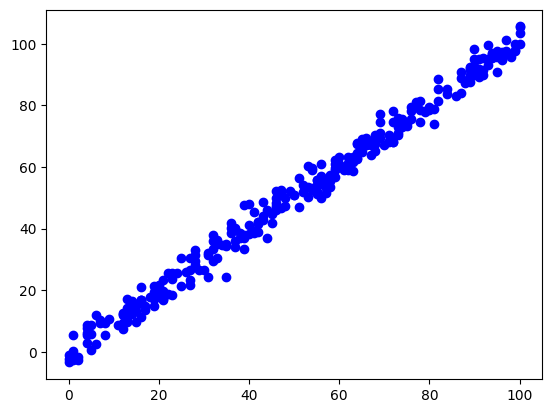

In [24]:

plt.scatter(X, y, c='b')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:

X_train.shape, X_test.shape

((240,), (60,))

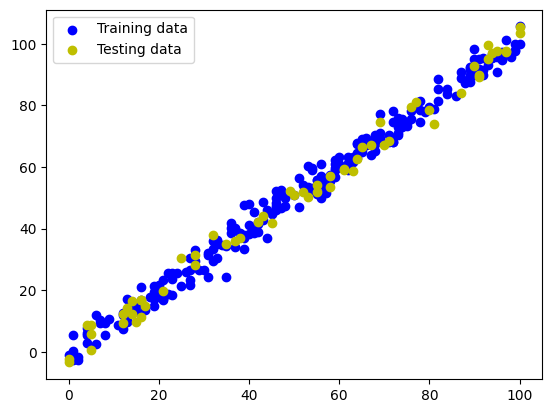

In [27]:

plt.scatter(X_train, y_train, c='b', label='Training data')
plt.scatter(X_test, y_test, c='y', label='Testing data')
plt.legend()
plt.show()

# Model Building

In [31]:
#create a model
model = tf.keras.Sequential([
      tf.keras.layers.Dense(4,input_shape=(1,)),
      tf.keras.layers.Dense(1)
])

In [32]:
#copile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

In [44]:
# train the model
epoch_number = 6
history = model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=epoch_number)

Epoch 1/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25.0688 - mae: 25.0688 
Epoch 2/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1490 - mae: 5.1490 
Epoch 3/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.4085 - mae: 8.4085 
Epoch 4/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2028 - mae: 3.2028  
Epoch 5/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2087 - mae: 3.2087 
Epoch 6/6
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.9277 - mae: 2.9277 


In [45]:
X_train.shape

(240,)

In [46]:
tf.expand_dims(X_train, axis=-1).shape

TensorShape([240, 1])

In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 4)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (168.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 28 (116.00 B)

In [48]:
y_pred = model.predict(X_test)
y_pred[:5]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[88.253845],
       [74.717514],
       [92.12136 ],
       [ 6.068921],
       [89.220726]], dtype=float32)

In [49]:
y_test[:5]

,y
203,92.887723
266,79.503415
152,97.001484
9,8.746748
233,89.739520


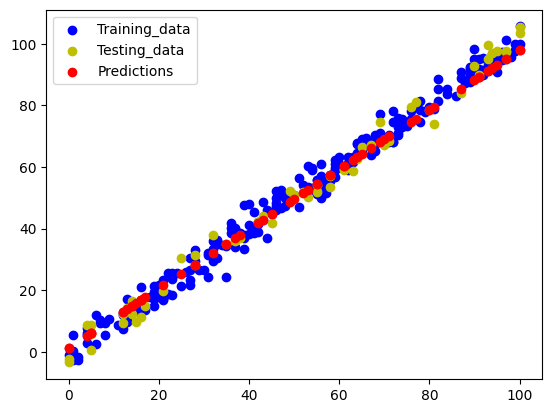

In [50]:
plt.scatter(X_train, y_train, c='b', label='Training_data')
plt.scatter(X_test, y_test, c='y', label='Testing_data')
plt.scatter(X_test, y_pred, c='r', label='Predictions')
plt.legend()
plt.show()

# Evaluate the model

In [51]:

# Using evaluate method
model.evaluate(X_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - loss: 2.8606 - mae: 2.8606


[2.692985773086548, 2.692985773086548]

In [58]:
# Using MAE (Mean Absolute Error)
# Instantiate the metric
mae_metric = tf.keras.metrics.MeanAbsoluteError()

# Update the metric with true and predicted values
mae_metric.update_state(y_test, tf.squeeze(y_pred))

# Get the result
mae = mae_metric.result().numpy()
print(mae)


2.692986


In [60]:
# Using MSE (Mean Squared Error)
# Instantiate the metric
mse_metric = tf.keras.metrics.MeanSquaredError()

# Update the metric with true and predicted values
mse_metric.update_state(y_test, tf.squeeze(y_pred))

# Get the result
mse = mse_metric.result().numpy()
print(mse)



11.789105


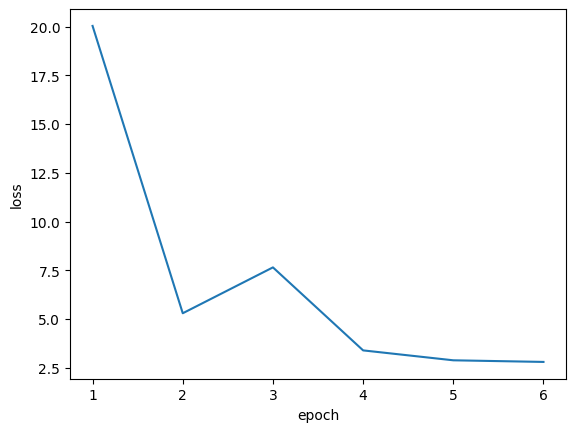

In [61]:
x_range = range(1, epoch_number+1)
loss = history.history['loss']
plt.plot(x_range, loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# Model Weights and Baises

In [62]:

# Let's see finalized weight values and bias values
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print(f"\nWeights:\n {weights} \nBiases:\n {biases}")


Weights:
 [[ 0.6774435   0.54301333 -1.5384219  -0.5556512 ]] 
Biases:
 [ 0.40196285 -0.3888131  -0.41792682  0.3865067 ]

Weights:
 [[ 0.92101413]
 [-0.50404125]
 [-0.47228318]
 [ 0.19782759]] 
Biases:
 [0.39448062]
